# FLIPKART SMARTWATCH DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Downloads//smartwatch_data2.csv')
df.head()

Product_url  \
0  https://www.flipkart.com/apple-watch-series-3-...   
1  https://www.flipkart.com/apple-watch-series-8-...   
2  https://www.flipkart.com/apple-watch-se-gps-ce...   
3  https://www.flipkart.com/apple-watch-series7-g...   
4  https://www.flipkart.com/apple-watch-series7-g...   

                                        Product_name  Brand Sale_price  \
0  APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...  APPLE     23,349   
1                           APPLE Watch Series 8 GPS  APPLE     48,900   
2  APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...  APPLE     36,900   
3  APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...  APPLE     44,544   
4  APPLE Watch Series7 (GPS, 41mm) - Starlight Al...  APPLE     41,900   

      MRP  Discount_percentage Memory No_of_ratings No_of_reviews  \
0  23,900                    2     8         55,019         4,837   
1  48,900                    0    32             67             5   
2  36,900                    0    32          3,278           245   
3  44,900                    0    32          2,479           145   
4  41,900                    0    32          2,479           145   

   Star_rating                                        Description  
0          4.6  Check your heart rate, and get notifications f...  
1          4.3  {'Sales Package': 'Smartwatch, Strap, 1m Magne...  
2          4.6  With powerful features to help keep you connec...  
3          4.6  The largest, most advanced Always-on Retina di...  
4          4.6  The largest, most advanced Always-on Retina di...

In [4]:
c=0
for i in range(len(df)):
    if df['Memory'][i]=='Memory data not available':
        c=c+1
c        

580

In [5]:
df.isnull().sum()

Product_url            0
Product_name           0
Brand                  0
Sale_price             0
MRP                    0
Discount_percentage    0
Memory                 0
No_of_ratings          0
No_of_reviews          0
Star_rating            0
Description            0
dtype: int64

In [6]:
df.shape

(957, 11)

In [7]:
df.describe()

Discount_percentage  Star_rating
count           957.000000   957.000000
mean             20.352142     3.562800
std              22.884061     1.602337
min               0.000000     0.000000
25%               0.000000     3.900000
50%              11.000000     4.200000
75%              39.000000     4.500000
max              74.000000     5.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          957 non-null    object 
 1   Product_name         957 non-null    object 
 2   Brand                957 non-null    object 
 3   Sale_price           957 non-null    object 
 4   MRP                  957 non-null    object 
 5   Discount_percentage  957 non-null    int64  
 6   Memory               957 non-null    object 
 7   No_of_ratings        957 non-null    object 
 8   No_of_reviews        957 non-null    object 
 9   Star_rating          957 non-null    float64
 10  Description          957 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 82.4+ KB


Attributes like ‘Sale_price’, ‘MRP’ etc , that are supposed to be numerical values, are of string type. Also, there are commas ( , ) in these strings. So first I have to remove those commas and convert them to float values. In case if some values in those columns are missing, they will be filled using null values.

## Data Cleaning

In [9]:
df['Sale_price']=df['Sale_price'].str.replace(',','')
for i in range(len(df)):
    if df['Sale_price'][i]=='No price available':
        df['Sale_price'][i]=np.nan
#     else:
#         df['Sale_price'][i]=float(df['Sale_price'][i])
        

<ipython-input-9-de5d3ad51083>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale_price'][i]=np.nan


In [10]:
df['MRP']=df['MRP'].str.replace(',','')
for i in range(len(df)):
    if df['MRP'][i]=='No price available':
        df['MRP'][i]=np.nan
#     else:
#         df['MRP'][i]=int(df['MRP'][i])


<ipython-input-10-81dc0b1213ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MRP'][i]=np.nan


In [11]:
type(df['MRP'][0])

str

In [12]:
# df['Memory']=df['Memory'].str.replace(',','')
for i in range(len(df)):
    if df['Memory'][i]=='Memory data not available':
        df['Memory'][i]=np.nan
    else:
        df['Memory'][i]=float(df['Memory'][i])
        

<ipython-input-12-21f13d111ff1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory'][i]=float(df['Memory'][i])
<ipython-input-12-21f13d111ff1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory'][i]=np.nan


In [13]:
df['No_of_ratings']=df['No_of_ratings'].str.replace(',','')
df['No_of_ratings']=df['No_of_ratings'].astype('float')

In [14]:
df['No_of_reviews']=df['No_of_reviews'].str.replace(',','')
df['No_of_reviews']=df['No_of_reviews'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          957 non-null    object 
 1   Product_name         957 non-null    object 
 2   Brand                957 non-null    object 
 3   Sale_price           953 non-null    object 
 4   MRP                  953 non-null    object 
 5   Discount_percentage  957 non-null    int64  
 6   Memory               377 non-null    object 
 7   No_of_ratings        957 non-null    float64
 8   No_of_reviews        957 non-null    float64
 9   Star_rating          957 non-null    float64
 10  Description          957 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 82.4+ KB


In [16]:
df.shape

(957, 11)

In [17]:
df[df.duplicated()].shape

(57, 11)

Out of 957 rows, there are 57 duplicate rows. So those duplicates are to be removed, keeping just one copy

In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(900, 11)

In [20]:
df.isnull().sum()

Product_url              0
Product_name             0
Brand                    0
Sale_price               4
MRP                      4
Discount_percentage      0
Memory                 525
No_of_ratings            0
No_of_reviews            0
Star_rating              0
Description              0
dtype: int64

Since the column 'Memory' has more than half of the total values as null values, we cannot just drop them. So lets take the mean of remaining values to fill them. In other columns with null values, we can remove them.

In [21]:
df['Memory']=df['Memory'].fillna(df['Memory'].mean())

Again, in the columns ‘Sale_price’ and ‘MRP’, there are 4 null values each, which can be safely dropped. So I am dropping them

In [22]:
df=df.dropna()

In [23]:
df.isnull().sum()

Product_url            0
Product_name           0
Brand                  0
Sale_price             0
MRP                    0
Discount_percentage    0
Memory                 0
No_of_ratings          0
No_of_reviews          0
Star_rating            0
Description            0
dtype: int64

In [24]:
df['Sale_price']=df['Sale_price'].astype('float')
df['MRP']=df['MRP'].astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          896 non-null    object 
 1   Product_name         896 non-null    object 
 2   Brand                896 non-null    object 
 3   Sale_price           896 non-null    float64
 4   MRP                  896 non-null    float64
 5   Discount_percentage  896 non-null    int64  
 6   Memory               896 non-null    float64
 7   No_of_ratings        896 non-null    float64
 8   No_of_reviews        896 non-null    float64
 9   Star_rating          896 non-null    float64
 10  Description          896 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 84.0+ KB


In [26]:
type(df['MRP'][0])

numpy.float64

## EDA

In [27]:
df.head()

Product_url  \
0  https://www.flipkart.com/apple-watch-series-3-...   
1  https://www.flipkart.com/apple-watch-series-8-...   
2  https://www.flipkart.com/apple-watch-se-gps-ce...   
3  https://www.flipkart.com/apple-watch-series7-g...   
4  https://www.flipkart.com/apple-watch-series7-g...   

                                        Product_name  Brand  Sale_price  \
0  APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...  APPLE     23349.0   
1                           APPLE Watch Series 8 GPS  APPLE     48900.0   
2  APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...  APPLE     36900.0   
3  APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...  APPLE     44544.0   
4  APPLE Watch Series7 (GPS, 41mm) - Starlight Al...  APPLE     41900.0   

       MRP  Discount_percentage  Memory  No_of_ratings  No_of_reviews  \
0  23900.0                    2     8.0        55019.0         4837.0   
1  48900.0                    0    32.0           67.0            5.0   
2  36900.0                    0    32.0         3278.0          245.0   
3  44900.0                    0    32.0         2479.0          145.0   
4  41900.0                    0    32.0         2479.0          145.0   

   Star_rating                                        Description  
0          4.6  Check your heart rate, and get notifications f...  
1          4.3  {'Sales Package': 'Smartwatch, Strap, 1m Magne...  
2          4.6  With powerful features to help keep you connec...  
3          4.6  The largest, most advanced Always-on Retina di...  
4          4.6  The largest, most advanced Always-on Retina di...

In [28]:
df['Brand'].value_counts()

APPLE      266
GARMIN     171
FOSSIL     108
Noise       96
boAt        64
SAMSUNG     59
FITBIT      51
Amazfit     47
Huawei      21
Honor       13
Name: Brand, dtype: int64

In [29]:
df['Memory'].value_counts()

19.736    524
32.000    191
4.000      97
16.000     44
1.000      29
8.000      11
Name: Memory, dtype: int64

In [30]:
df['Star_rating'].value_counts()

0.0    152
4.6    108
4.5    101
4.3     96
4.2     85
4.1     78
3.9     51
4.0     51
4.4     35
4.7     31
4.8     28
3.8     23
3.7      9
3.6      8
3.5      7
5.0      7
3.3      6
3.2      6
3.1      4
3.4      4
4.9      2
2.6      2
2.8      1
2.5      1
Name: Star_rating, dtype: int64

In [31]:
df['Discount']=''
for i in range(len(df)):
    if df['Discount_percentage'].iloc[i]==0:
        df['Discount'].iloc[i]='No'
    else:
        df['Discount'].iloc[i]='Yes'

C:\Users\Sandra Puthuvamana\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0.5, 0, 'Brand')

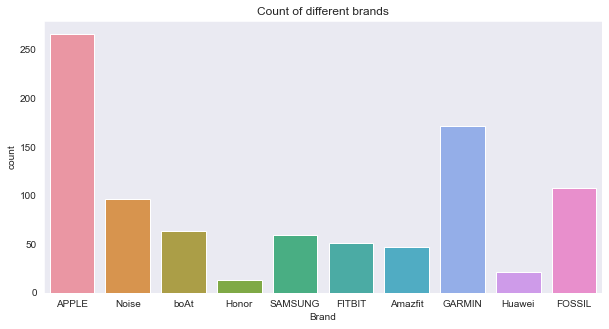

In [32]:
plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.set_palette('Set2')
sns.countplot(data=df, x="Brand")
plt.title('Count of different brands')
plt.xlabel('Brand')

Apple products are the most in number with around 250 items. Least are the products of the brand Honor with around 15 items.

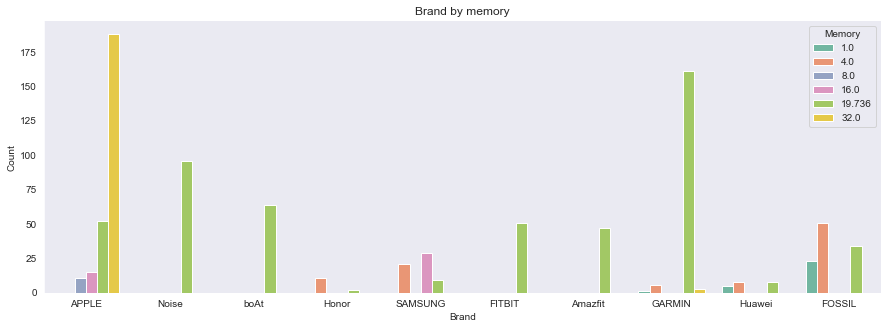

In [33]:
plt.figure(figsize=(15,5))
sns.set_style('dark')
sns.set_palette('Set2')
sns.countplot(data=df, x="Brand", hue='Memory')
plt.title('Brand by memory')
plt.xlabel('Brand')
plt.ylabel('Count')
sns.despine()
plt.show()

In this, when products with different memory are separately plotted, it is found that Noise, boAt, FITBIT and Amazfit manufactured watches with only one internal memory type, 19.736 GB whereas others produced watches with different memory capacities. But,since this value was found peculiar, I checked the product links of those products where I
found no detail about memory. So I assumed that this value is some mistake in the data or it’s some feature I don’t know much about. Since I don't know the exact reason for this value and also since this value was more in number, I decided not to consider this feature ‘Memory’ for further analysis.

In [34]:
df2=df[['Brand','No_of_ratings']]
df2=df2.groupby('Brand').sum()
df2=df2.reset_index()
df2.sort_values(by='No_of_ratings')

Brand  No_of_ratings
4   GARMIN         1686.0
6   Huawei        15233.0
1  Amazfit        47396.0
2   FITBIT        55101.0
3   FOSSIL        55938.0
5    Honor        67802.0
8  SAMSUNG       263556.0
0    APPLE       897615.0
7    Noise      3312405.0
9     boAt      6317637.0

In [35]:
df3=df[['Brand','No_of_reviews']]
df3=df3.groupby('Brand').sum()
df3=df3.reset_index()
df3.sort_values(by='No_of_reviews')

Brand  No_of_reviews
4   GARMIN          210.0
6   Huawei         2408.0
1  Amazfit         4558.0
2   FITBIT         5390.0
3   FOSSIL         5905.0
5    Honor         9729.0
8  SAMSUNG        25815.0
0    APPLE        77688.0
7    Noise       342054.0
9     boAt       561995.0

C:\Users\Sandra Puthuvamana\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sandra Puthuvamana\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average number of reviews of different brands')

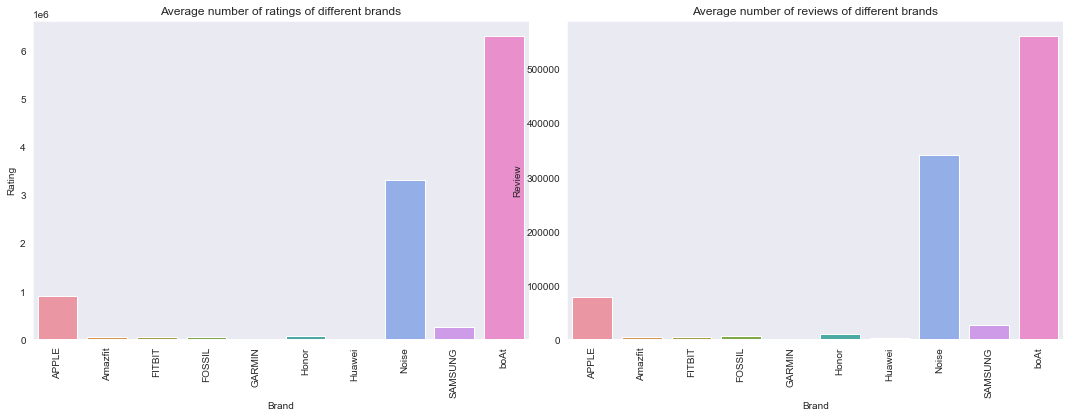

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.tight_layout() 
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])

plt.subplot(1,2,1)
# plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.set_palette('Set2')
plt.xticks(rotation=90)
sns.barplot(df2['Brand'],df2['No_of_ratings'])
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.title('Average number of ratings of different brands')

plt.subplot(1,2,2)
# plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.set_palette('Set2')
plt.xticks(rotation=90)
sns.barplot(df3['Brand'],df3['No_of_reviews'])
plt.xlabel('Brand')
plt.ylabel('Review')
plt.title('Average number of reviews of different brands')

It is found that boAt has the highest average number of ratings (6317637) and reviews (561995). But this is just a number and it can be positive as well as negative. Also, Garmin and Huawei do not have a single review or rating.

In [37]:
d=df[df['Memory']==19.736]
d['Product_url'].iloc[10]

'https://www.flipkart.com/apple-watch-series-2/p/itma50a7ab07ae44?pid=SMWETUF5AEZXSY46&lid=LSTSMWETUF5AEZXSY46YZF7TO'

In [38]:
df2=df[['Brand','Star_rating']]
df2=df2.groupby('Brand').mean()
df2=df2.reset_index()
df2.sort_values(by='Star_rating')

Brand  Star_rating
4   GARMIN     1.899415
2   FITBIT     2.719608
1  Amazfit     3.278723
7    Noise     3.501042
9     boAt     3.775000
3   FOSSIL     3.776852
6   Huawei     3.938095
8  SAMSUNG     4.054237
5    Honor     4.346154
0    APPLE     4.475940

C:\Users\Sandra Puthuvamana\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average star ratings of different brands')

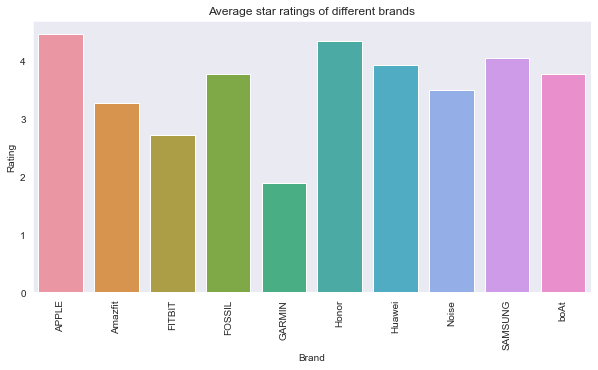

In [39]:
plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.set_palette('Set2')
plt.xticks(rotation=90)
sns.barplot(df2['Brand'],df2['Star_rating'])
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.title('Average star ratings of different brands')

It was found that Apple has the maximum star rating among all brands, that is 4.47. The minimum is for Garmin with an average rating of 1.89. This suggests that Apple’s smartwatch is the most popular and the most accepted one. And also that
Garmin’s is the least accepted one among these 10 brands. Also, from the previous graph, it was seen that Apple did not have many ratings compared to boAt and Noise. So, we can assume that most of the ratings that Apple has got are pretty high.

In [40]:
df.head()

Product_url  \
0  https://www.flipkart.com/apple-watch-series-3-...   
1  https://www.flipkart.com/apple-watch-series-8-...   
2  https://www.flipkart.com/apple-watch-se-gps-ce...   
3  https://www.flipkart.com/apple-watch-series7-g...   
4  https://www.flipkart.com/apple-watch-series7-g...   

                                        Product_name  Brand  Sale_price  \
0  APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...  APPLE     23349.0   
1                           APPLE Watch Series 8 GPS  APPLE     48900.0   
2  APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...  APPLE     36900.0   
3  APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...  APPLE     44544.0   
4  APPLE Watch Series7 (GPS, 41mm) - Starlight Al...  APPLE     41900.0   

       MRP  Discount_percentage  Memory  No_of_ratings  No_of_reviews  \
0  23900.0                    2     8.0        55019.0         4837.0   
1  48900.0                    0    32.0           67.0            5.0   
2  36900.0                    0    32.0         3278.0          245.0   
3  44900.0                    0    32.0         2479.0          145.0   
4  41900.0                    0    32.0         2479.0          145.0   

   Star_rating                                        Description Discount  
0          4.6  Check your heart rate, and get notifications f...      Yes  
1          4.3  {'Sales Package': 'Smartwatch, Strap, 1m Magne...       No  
2          4.6  With powerful features to help keep you connec...       No  
3          4.6  The largest, most advanced Always-on Retina di...       No  
4          4.6  The largest, most advanced Always-on Retina di...       No

Text(0.5, 1.0, 'Discount availability for different brands')

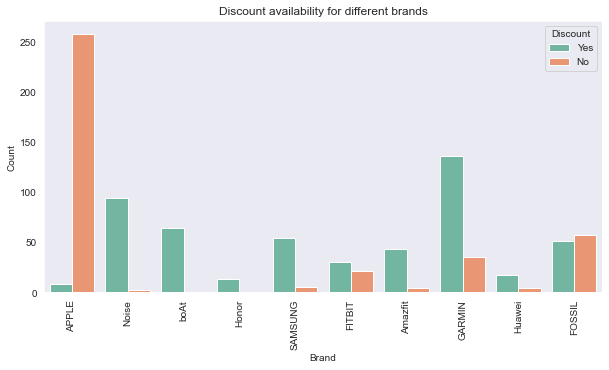

In [41]:
plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.set_palette('Set2')
plt.xticks(rotation=90)
sns.countplot(data=df, x="Brand", hue='Discount')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Discount availability for different brands')

Apple is not offering much discount for watches, whereas Garmin gives many of its watches on discount.But discount is a thing in business that should have a balance.In that case, it can be seen that Fossil and Fitbit maintain a good balance between giving and not giving discounts.

In [42]:
df2=df[['Brand','Discount_percentage']]
df2=df2.groupby('Brand').mean()
df2=df2.reset_index()
df2

Brand  Discount_percentage
0    APPLE             0.496241
1  Amazfit            27.531915
2   FITBIT            10.666667
3   FOSSIL            16.120370
4   GARMIN            15.076023
5    Honor            26.384615
6   Huawei            32.571429
7    Noise            46.104167
8  SAMSUNG            19.000000
9     boAt            60.312500

Text(0.5, 1.0, 'Average Discount percentage for different brands')

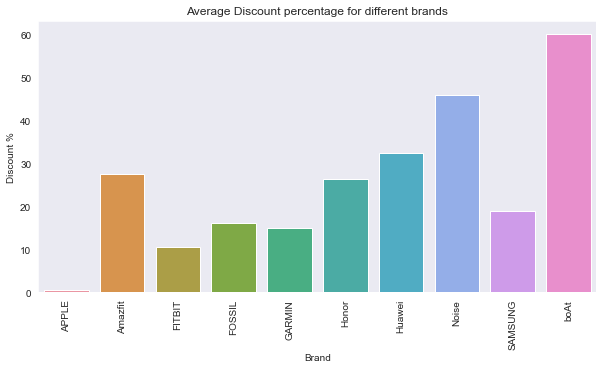

In [43]:
plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.set_palette('Set2')
plt.xticks(rotation=90)
sns.barplot(data=df2, x=df2["Brand"], y=df2['Discount_percentage'])
plt.xlabel('Brand')
plt.ylabel('Discount %')
plt.title('Average Discount percentage for different brands')

It was found that boAt has the maximum average discount percentage. Minimum average discount percentage is for Apple. It seems to hardly give any discount.

In [44]:
df['Description'][0]

'Check your heart rate, and get notifications for low and high heart rate and irregular rhythm. Measure your workouts, and track and share your activity. Take calls, send and receive messages, and listen to your favourite songs from Apple Music. Apple Watch Series 3 lets you do it all right from your wrist.'

In [45]:
df2=df[['Brand','Sale_price']]
df2=df2.groupby('Brand').min()
df2=df2.reset_index()

In [46]:
df3=df2.copy()
df3

Brand  Sale_price
0    APPLE     20900.0
1  Amazfit      2999.0
2   FITBIT      6948.0
3   FOSSIL      5398.0
4   GARMIN      8990.0
5    Honor      4999.0
6   Huawei      6990.0
7    Noise      1499.0
8  SAMSUNG     11177.0
9     boAt      1499.0

In [47]:
df3.rename(columns={'Sale_price':'Min price'},inplace=True)
df3

Brand  Min price
0    APPLE    20900.0
1  Amazfit     2999.0
2   FITBIT     6948.0
3   FOSSIL     5398.0
4   GARMIN     8990.0
5    Honor     4999.0
6   Huawei     6990.0
7    Noise     1499.0
8  SAMSUNG    11177.0
9     boAt     1499.0

In [48]:
df2=df[['Brand','Sale_price']]
df2=df2.groupby('Brand').max()
df2=df2.reset_index()

In [49]:
df3['Max price']=df2['Sale_price']
df3

Brand  Min price  Max price
0    APPLE    20900.0    89900.0
1  Amazfit     2999.0    23999.0
2   FITBIT     6948.0    26499.0
3   FOSSIL     5398.0    24995.0
4   GARMIN     8990.0   129990.0
5    Honor     4999.0    17999.0
6   Huawei     6990.0    29999.0
7    Noise     1499.0     6055.0
8  SAMSUNG    11177.0    50408.0
9     boAt     1499.0     4499.0

In [50]:
df3['Difference']=df3['Max price']-df3['Min price']
df3

Brand  Min price  Max price  Difference
0    APPLE    20900.0    89900.0     69000.0
1  Amazfit     2999.0    23999.0     21000.0
2   FITBIT     6948.0    26499.0     19551.0
3   FOSSIL     5398.0    24995.0     19597.0
4   GARMIN     8990.0   129990.0    121000.0
5    Honor     4999.0    17999.0     13000.0
6   Huawei     6990.0    29999.0     23009.0
7    Noise     1499.0     6055.0      4556.0
8  SAMSUNG    11177.0    50408.0     39231.0
9     boAt     1499.0     4499.0      3000.0

In [51]:
df['diff']=(df['MRP']-df['Sale_price'])/df['MRP']
df.head()

Product_url  \
0  https://www.flipkart.com/apple-watch-series-3-...   
1  https://www.flipkart.com/apple-watch-series-8-...   
2  https://www.flipkart.com/apple-watch-se-gps-ce...   
3  https://www.flipkart.com/apple-watch-series7-g...   
4  https://www.flipkart.com/apple-watch-series7-g...   

                                        Product_name  Brand  Sale_price  \
0  APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...  APPLE     23349.0   
1                           APPLE Watch Series 8 GPS  APPLE     48900.0   
2  APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...  APPLE     36900.0   
3  APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...  APPLE     44544.0   
4  APPLE Watch Series7 (GPS, 41mm) - Starlight Al...  APPLE     41900.0   

       MRP  Discount_percentage  Memory  No_of_ratings  No_of_reviews  \
0  23900.0                    2     8.0        55019.0         4837.0   
1  48900.0                    0    32.0           67.0            5.0   
2  36900.0                    0    32.0         3278.0          245.0   
3  44900.0                    0    32.0         2479.0          145.0   
4  41900.0                    0    32.0         2479.0          145.0   

   Star_rating                                        Description Discount  \
0          4.6  Check your heart rate, and get notifications f...      Yes   
1          4.3  {'Sales Package': 'Smartwatch, Strap, 1m Magne...       No   
2          4.6  With powerful features to help keep you connec...       No   
3          4.6  The largest, most advanced Always-on Retina di...       No   
4          4.6  The largest, most advanced Always-on Retina di...       No   

       diff  
0  0.023054  
1  0.000000  
2  0.000000  
3  0.007929  
4  0.000000

In [52]:
df['diff'].max()

0.7497495826377295

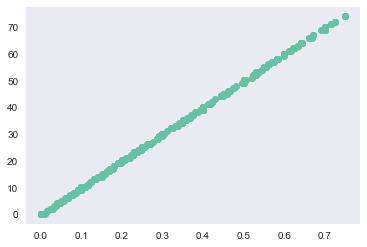

In [53]:
plt.scatter(df['diff'],df['Discount_percentage'])

In [54]:
# for i in df.columns:
#     if df[i].dtype=='float64':
#         print(i)
#         plt.boxplot(df[i])
#         plt.show()

In [55]:
df['Product_url'][0]

'https://www.flipkart.com/apple-watch-series-3-gps-42mm-space-grey-aluminium-case-black-sport-band/p/itm91c560e722cdd?pid=SMWF94AYMNYHTYDJ&lid=LSTSMWF94AYMNYHTYDJFOPINH'

In [56]:
df.groupby(['Brand','Product_name']).mean().reset_index()

Brand                                       Product_name    Sale_price  \
0    APPLE                               APPLE Apple Watch SE  31400.000000   
1    APPLE                                        APPLE Watch  57455.555556   
2    APPLE                                    APPLE Watch 2 -  66400.000000   
3    APPLE                      APPLE Watch Nike Series 5 GPS  42400.000000   
4    APPLE           APPLE Watch Nike Series 5 GPS + Cellular  51400.000000   
..     ...                                                ...           ...   
372   boAt  boAt Wave Ultima with 1.8 inch Curve Arc HD Di...   2999.000000   
373   boAt  boAt Wave beat 1.69Inch HD display with comple...   1499.000000   
374   boAt  boAt Wave pro 1.69inch HD display withTemperat...   2865.666667   
375   boAt                            boAt Xplorer Smartwatch   3499.000000   
376   boAt                              boAt storm Smartwatch   2955.000000   

              MRP  Discount_percentage  Memory  No_of_ratings  No_of_reviews  \
0    31400.000000             0.000000  32.000    4667.000000         325.00   
1    57455.555556             0.000000  19.736     395.333333          58.00   
2    66400.000000             0.000000  19.736     201.000000          23.00   
3    42400.000000             0.000000  32.000       4.250000           2.25   
4    51400.000000             0.000000  32.000       4.250000           0.75   
..            ...                  ...     ...            ...            ...   
372   6990.000000            57.000000  19.736      75.000000          13.00   
373   5990.000000            74.000000  19.736   17788.000000        1337.00   
374   6990.000000            58.333333  19.736   15229.000000        1346.00   
375   7990.000000            56.000000  19.736   11308.000000        1091.00   
376   5990.000000            50.000000  19.736       0.000000           0.00   

     Star_rating      diff  
0       4.600000  0.000000  
1       4.366667  0.000000  
2       4.600000  0.000000  
3       3.525000  0.000000  
4       3.050000  0.000000  
..           ...       ...  
372     4.200000  0.570959  
373     4.100000  0.749750  
374     3.900000  0.590033  
375     3.800000  0.562078  
376     0.000000  0.506678  

[377 rows x 10 columns]

In [57]:
df3=df2.copy()
df3

Brand  Sale_price
0    APPLE     89900.0
1  Amazfit     23999.0
2   FITBIT     26499.0
3   FOSSIL     24995.0
4   GARMIN    129990.0
5    Honor     17999.0
6   Huawei     29999.0
7    Noise      6055.0
8  SAMSUNG     50408.0
9     boAt      4499.0

In [58]:
df3.rename(columns={'Sale_price':'Min price'},inplace=True)
df3

Brand  Min price
0    APPLE    89900.0
1  Amazfit    23999.0
2   FITBIT    26499.0
3   FOSSIL    24995.0
4   GARMIN   129990.0
5    Honor    17999.0
6   Huawei    29999.0
7    Noise     6055.0
8  SAMSUNG    50408.0
9     boAt     4499.0

In [59]:
df2=df[['Brand','Product_name','Sale_price']]
df2=df2.groupby(['Brand','Product_name']).min()
df2=df2.reset_index()

In [60]:
df3['Min price']=df2['Sale_price']
df3

Brand  Min price
0    APPLE    29900.0
1  Amazfit    25900.0
2   FITBIT    48900.0
3   FOSSIL    40900.0
4   GARMIN    49900.0
5    Honor    31600.0
6   Huawei    31600.0
7    Noise    41180.0
8  SAMSUNG    29900.0
9     boAt    33900.0

In [61]:
df2=df[['Brand','Product_name','Sale_price']]
df2=df2.groupby(['Brand','Product_name']).max()
df2=df2.reset_index()

In [62]:
df3['Max price']=df2['Sale_price']
df3

Brand  Min price  Max price
0    APPLE    29900.0    32900.0
1  Amazfit    25900.0    64900.0
2   FITBIT    48900.0    83900.0
3   FOSSIL    40900.0    43900.0
4   GARMIN    49900.0    52900.0
5    Honor    31600.0    33500.0
6   Huawei    31600.0    32900.0
7    Noise    41180.0    41180.0
8  SAMSUNG    29900.0    32900.0
9     boAt    33900.0    33900.0

In [63]:
df3['Difference']=df3['Max price']-df3['Min price']
df3

Brand  Min price  Max price  Difference
0    APPLE    29900.0    32900.0      3000.0
1  Amazfit    25900.0    64900.0     39000.0
2   FITBIT    48900.0    83900.0     35000.0
3   FOSSIL    40900.0    43900.0      3000.0
4   GARMIN    49900.0    52900.0      3000.0
5    Honor    31600.0    33500.0      1900.0
6   Huawei    31600.0    32900.0      1300.0
7    Noise    41180.0    41180.0         0.0
8  SAMSUNG    29900.0    32900.0      3000.0
9     boAt    33900.0    33900.0         0.0

In [64]:
df['Brand'].value_counts()

APPLE      266
GARMIN     171
FOSSIL     108
Noise       96
boAt        64
SAMSUNG     59
FITBIT      51
Amazfit     47
Huawei      21
Honor       13
Name: Brand, dtype: int64

In [65]:
df_apple=df[df['Brand']=='APPLE']

In [66]:
df_apple=df_apple.groupby('Product_name').mean()
df_apple=df_apple.sort_values(by='Star_rating')
df_apple=df_apple.head().reset_index()
df_apple['BRAND']='APPLE'
df_apple

Product_name    Sale_price           MRP  \
0  APPLE Watch Nike Series 5 GPS + Cellular  51400.000000  51400.000000   
1             APPLE Watch Nike Series 5 GPS  42400.000000  42400.000000   
2       APPLE Watch Series 6 GPS + Cellular  64358.333333  64358.333333   
3       APPLE Watch Series 5 GPS + Cellular  60122.222222  63233.333333   
4                  APPLE Watch Series 8 GPS  47185.714286  47185.714286   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0             0.000000    32.0       4.250000       0.750000     3.050000   
1             0.000000    32.0       4.250000       2.250000     3.525000   
2             0.000000    32.0     660.833333      57.250000     4.175000   
3             4.444444    32.0     188.333333      18.722222     4.222222   
4             0.000000    32.0      67.000000       5.000000     4.300000   

      diff  BRAND  
0  0.00000  APPLE  
1  0.00000  APPLE  
2  0.00000  APPLE  
3  0.04528  APPLE  
4  0.00000  APPLE

In [67]:
df_garmin=df[df['Brand']=='GARMIN'].head()

In [68]:
df_garmin=df_garmin.groupby('Product_name').mean()
df_garmin=df_garmin.sort_values(by='Star_rating')
df_garmin=df_garmin.head().reset_index()
df_garmin['BRAND']='GARMIN'
df_garmin

Product_name  Sale_price      MRP  \
0  GARMIN Forerunner 255 Music, GPS Running Smart...     40990.0  42990.0   
1  GARMIN Instinct 2 Solar, Battery Up to 28 days...     44990.0  46990.0   
2  GARMIN Venu Sq Music, Smartwatch, Advanced Sle...     20990.0  25990.0   
3  GARMIN Venu Sq, Smartwatch, Advanced Sleep Mon...     16990.0  20990.0   
4  GARMIN Venu 2 Plus, AMOLED Display, Built in S...     39490.0  46990.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                    4   4.000            0.0            0.0          0.0   
1                    4  19.736            4.0            1.0          4.3   
2                   19  19.736           20.0            0.0          4.3   
3                   19  19.736           78.0           11.0          4.4   
4                   15  19.736            5.0            1.0          4.8   

       diff   BRAND  
0  0.046522  GARMIN  
1  0.042562  GARMIN  
2  0.192382  GARMIN  
3  0.190567  GARMIN  
4  0.159608  GARMIN

In [69]:
df_fossil=df[df['Brand']=='FOSSIL'].head()

In [70]:
df_fossil=df_fossil.groupby('Product_name').mean()
df_fossil=df_fossil.sort_values(by='Star_rating')
df_fossil=df_fossil.head().reset_index()
df_fossil['BRAND']='FOSSIL'
df_fossil

Product_name  Sale_price      MRP  Discount_percentage  \
0      FOSSIL Garrett HR Smartwatch     14995.0  22995.0                   34   
1  FOSSIL The Carlyle HR Smartwatch     14995.0  22995.0                   34   
2           FOSSIL Gen 6 Smartwatch     24995.0  24995.0                    0   

   Memory  No_of_ratings  No_of_reviews  Star_rating      diff   BRAND  
0   1.000          408.0           53.0          4.0  0.347902  FOSSIL  
1   1.000         4250.0          372.0          4.0  0.347902  FOSSIL  
2  19.736          276.0           18.0          4.2  0.000000  FOSSIL

In [71]:
df_noise=df[df['Brand']=='Noise'].head()

In [72]:
df_noise=df_noise.groupby('Product_name').mean()
df_noise=df_noise.sort_values(by='Star_rating')
df_noise=df_noise.head().reset_index()
df_noise['BRAND']='Noise'
df_noise

Product_name  Sale_price     MRP  \
0  Noise ColorFit Qube Spo2, 1.4" Full Touch disp...      1499.0  4999.0   
1  Noise ColorFit Caliber Smart Watch with 15-day...      1699.0  3999.0   
2  Noise Icon Buzz BT Calling with 1.69" display ...      2099.0  4999.0   
3  Noise ColorFit Caliber Go with 1.69 inch HD Di...      1899.0  3999.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                   70  19.736        77085.0         6488.0          4.1   
1                   57  19.736       227759.0        23439.0          4.2   
2                   58  19.736       149302.0        12557.0          4.2   
3                   52  19.736        15476.0         1283.0          4.3   

       diff  BRAND  
0  0.700140  Noise  
1  0.575144  Noise  
2  0.580116  Noise  
3  0.525131  Noise

In [73]:
df_boat=df[df['Brand']=='boAt'].head()

In [74]:
df_boat=df_boat.groupby('Product_name').mean()
df_boat=df_boat.sort_values(by='Star_rating')
df_boat=df_boat.head().reset_index()
df_boat['BRAND']='boAt'
df_boat

Product_name  Sale_price     MRP  \
0  boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...      1799.0  5990.0   
1  boAt Storm call 1.69 inch HD display with blue...      2199.0  7990.0   
2  boAt Wave Connect with Bluetooth Calling, Voic...      2999.0  5990.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                   69  19.736        70014.0         4890.0          4.0   
1                   72  19.736        60361.0         4661.0          4.1   
2                   49  19.736        30964.0         2883.0          4.2   

       diff BRAND  
0  0.699666  boAt  
1  0.724781  boAt  
2  0.499332  boAt

In [75]:
df_samsung=df[df['Brand']=='SAMSUNG'].head()

In [76]:
df_samsung=df_samsung.groupby('Product_name').mean()
df_samsung=df_samsung.sort_values(by='Star_rating')
df_samsung=df_samsung.head().reset_index()
df_samsung['BRAND']='SAMSUNG'
df_samsung

Product_name  Sale_price      MRP  \
0  SAMSUNG Watch 5 pro 45mmSuper AMOLED displayBl...     44999.0  48999.0   
1                       SAMSUNG Galaxy Watch 3 41 mm     11700.0  30990.0   
2  SAMSUNG Watch 4, 44mmSuper AMOLED bluetooth ca...     14588.5  29999.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                  8.0  16.000           66.0            7.0          4.2   
1                 62.0  19.736         1402.0          173.0          4.3   
2                 50.5  16.000        26363.0         2456.0          4.4   

       diff    BRAND  
0  0.081634  SAMSUNG  
1  0.622459  SAMSUNG  
2  0.513700  SAMSUNG

In [77]:
df_fitbit=df[df['Brand']=='FITBIT'].head()

In [78]:
df_fitbit=df_fitbit.groupby('Product_name').mean()
df_fitbit=df_fitbit.sort_values(by='Star_rating')
df_fitbit=df_fitbit.head().reset_index()
df_fitbit['BRAND']='FITBIT'
df_fitbit

Product_name  Sale_price      MRP  \
0  FITBIT fitbit charge 5 black Smartwatch     14999.0  14999.0   
1   FITBIT fitbit charge 5 blue Smartwatch     14999.0  14999.0   
2                  FITBIT Sense Smartwatch     20499.0  22999.0   
3                FITBIT Versa 2 Smartwatch     13124.0  14999.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                    0  19.736            0.0            0.0          0.0   
1                    0  19.736            0.0            0.0          0.0   
2                   10  19.736          542.0           46.0          4.2   
3                   12  19.736         3965.0          302.0          4.3   

       diff   BRAND  
0  0.000000  FITBIT  
1  0.000000  FITBIT  
2  0.108700  FITBIT  
3  0.125008  FITBIT

In [79]:
df_amazfit=df[df['Brand']=='Amazfit'].head()

In [80]:
df_amazfit=df_amazfit.groupby('Product_name').mean()
df_amazfit=df_amazfit.sort_values(by='Star_rating')
df_amazfit=df_amazfit.head().reset_index()
df_amazfit['BRAND']='Amazfit'
df_amazfit

Product_name  Sale_price      MRP  \
0  Amazfit GTR 2 (New version)1.39HD AMOLEDBlueto...      7999.0  16999.0   
1  Amazfit T rex Pro 1.3HD AMOLED with advanced G...      9999.0  17999.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                   52  19.736         5998.0          591.0          4.3   
1                   44  19.736         3549.0          398.0          4.5   

       diff    BRAND  
0  0.529443  Amazfit  
1  0.444469  Amazfit

In [81]:
df_huwai=df[df['Brand']=='Huawei'].head()

In [82]:
df_huwai=df_huwai.groupby('Product_name').mean()
df_huwai=df_huwai.sort_values(by='Star_rating')
df_huwai=df_huwai.head().reset_index()
df_huwai['BRAND']='Huawei'
df_huwai

Product_name  Sale_price      MRP  \
0            Huawei GT 2 Pro Smartwatch     19490.0  29990.0   
1           Huawei Watch Fit Smartwatch      6990.0  14990.0   
2  Huawei Watch GT 2 (46 mm) Smartwatch     14990.0  20990.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0                 34.5   4.000          131.0           15.5          4.1   
1                 53.0   4.000          116.0           18.0          4.3   
2                 28.0  19.736         3214.0          508.0          4.5   

       diff   BRAND  
0  0.350117  Huawei  
1  0.533689  Huawei  
2  0.285850  Huawei

In [83]:
df_honor=df[df['Brand']=='Honor'].head()

In [84]:
df_honor=df_honor.groupby('Product_name').mean()
df_honor=df_honor.sort_values(by='Star_rating')
df_honor=df_honor.head().reset_index()
df_honor['BRAND']='Honor'
df_honor

Product_name    Sale_price      MRP  \
0             Honor Watch GS 3 Smartwatch  16332.333333  18999.0   
1  Honor Magic Watch 2 (46 mm) Smartwatch  13999.000000  15999.0   
2   Honor Magic Watch 2 (46mm) Smartwatch  11999.000000  14999.0   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0            13.666667     4.0           40.0            1.0          4.3   
1            12.000000     4.0        14352.0         2006.0          4.4   
2            20.000000     4.0        14352.0         2006.0          4.4   

       diff  BRAND  
0  0.140358  Honor  
1  0.125008  Honor  
2  0.200013  Honor

In [85]:
df_coll=df_apple

In [86]:
df_coll=df_coll.append(df_garmin)
# df_coll

In [87]:
df_coll=df_coll.append(df_fossil)
# df_coll

In [88]:
df_coll=df_coll.append(df_noise)
# df_coll

In [89]:
df_coll=df_coll.append(df_boat)
# df_coll

In [90]:
df_coll=df_coll.append(df_fitbit)
# df_coll

In [91]:
df_coll=df_coll.append(df_samsung)
# df_coll

In [92]:
df_coll=df_coll.append(df_amazfit)
# df_coll

In [93]:
df_coll=df_coll.append(df_huwai)
# df_coll

In [94]:
df_coll=df_coll.append(df_honor)
# df_coll

In [95]:
df_coll.head()

Product_name    Sale_price           MRP  \
0  APPLE Watch Nike Series 5 GPS + Cellular  51400.000000  51400.000000   
1             APPLE Watch Nike Series 5 GPS  42400.000000  42400.000000   
2       APPLE Watch Series 6 GPS + Cellular  64358.333333  64358.333333   
3       APPLE Watch Series 5 GPS + Cellular  60122.222222  63233.333333   
4                  APPLE Watch Series 8 GPS  47185.714286  47185.714286   

   Discount_percentage  Memory  No_of_ratings  No_of_reviews  Star_rating  \
0             0.000000    32.0       4.250000       0.750000     3.050000   
1             0.000000    32.0       4.250000       2.250000     3.525000   
2             0.000000    32.0     660.833333      57.250000     4.175000   
3             4.444444    32.0     188.333333      18.722222     4.222222   
4             0.000000    32.0      67.000000       5.000000     4.300000   

      diff  BRAND  
0  0.00000  APPLE  
1  0.00000  APPLE  
2  0.00000  APPLE  
3  0.04528  APPLE  
4  0.00000  APPLE

In [96]:
# plt.xticks(rotation=90)
# plt.scatter(df4['Product_name'],df4['Star_rating'])

In [97]:
# plt.figure(figsize=(10,5))
# plt.plot(df4['Sale_price'],color='teal')
# plt.plot(df4['MRP'],color='springgreen')

In [98]:
colmin=df_coll[['BRAND','Product_name','MRP','Sale_price']]
colmin=colmin.groupby(['BRAND','Product_name']).min().reset_index()
colmin

BRAND                                       Product_name           MRP  \
0     APPLE                      APPLE Watch Nike Series 5 GPS  42400.000000   
1     APPLE           APPLE Watch Nike Series 5 GPS + Cellular  51400.000000   
2     APPLE                APPLE Watch Series 5 GPS + Cellular  63233.333333   
3     APPLE                APPLE Watch Series 6 GPS + Cellular  64358.333333   
4     APPLE                           APPLE Watch Series 8 GPS  47185.714286   
5   Amazfit  Amazfit GTR 2 (New version)1.39HD AMOLEDBlueto...  16999.000000   
6   Amazfit  Amazfit T rex Pro 1.3HD AMOLED with advanced G...  17999.000000   
7    FITBIT                            FITBIT Sense Smartwatch  22999.000000   
8    FITBIT                          FITBIT Versa 2 Smartwatch  14999.000000   
9    FITBIT            FITBIT fitbit charge 5 black Smartwatch  14999.000000   
10   FITBIT             FITBIT fitbit charge 5 blue Smartwatch  14999.000000   
11   FOSSIL                       FOSSIL Garrett HR Smartwatch  22995.000000   
12   FOSSIL                            FOSSIL Gen 6 Smartwatch  24995.000000   
13   FOSSIL                   FOSSIL The Carlyle HR Smartwatch  22995.000000   
14   GARMIN  GARMIN Forerunner 255 Music, GPS Running Smart...  42990.000000   
15   GARMIN  GARMIN Instinct 2 Solar, Battery Up to 28 days...  46990.000000   
16   GARMIN  GARMIN Venu 2 Plus, AMOLED Display, Built in S...  46990.000000   
17   GARMIN  GARMIN Venu Sq Music, Smartwatch, Advanced Sle...  25990.000000   
18   GARMIN  GARMIN Venu Sq, Smartwatch, Advanced Sleep Mon...  20990.000000   
19    Honor             Honor Magic Watch 2 (46 mm) Smartwatch  15999.000000   
20    Honor              Honor Magic Watch 2 (46mm) Smartwatch  14999.000000   
21    Honor                        Honor Watch GS 3 Smartwatch  18999.000000   
22   Huawei                         Huawei GT 2 Pro Smartwatch  29990.000000   
23   Huawei                        Huawei Watch Fit Smartwatch  14990.000000   
24   Huawei               Huawei Watch GT 2 (46 mm) Smartwatch  20990.000000   
25    Noise  Noise ColorFit Caliber Go with 1.69 inch HD Di...   3999.000000   
26    Noise  Noise ColorFit Caliber Smart Watch with 15-day...   3999.000000   
27    Noise  Noise ColorFit Qube Spo2, 1.4" Full Touch disp...   4999.000000   
28    Noise  Noise Icon Buzz BT Calling with 1.69" display ...   4999.000000   
29  SAMSUNG                       SAMSUNG Galaxy Watch 3 41 mm  30990.000000   
30  SAMSUNG  SAMSUNG Watch 4, 44mmSuper AMOLED bluetooth ca...  29999.000000   
31  SAMSUNG  SAMSUNG Watch 5 pro 45mmSuper AMOLED displayBl...  48999.000000   
32     boAt  boAt Storm call 1.69 inch HD display with blue...   7990.000000   
33     boAt  boAt Wave Connect with Bluetooth Calling, Voic...   5990.000000   
34     boAt  boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...   5990.000000   

      Sale_price  
0   42400.000000  
1   51400.000000  
2   60122.222222  
3   64358.333333  
4   47185.714286  
5    7999.000000  
6    9999.000000  
7   20499.000000  
8   13124.000000  
9   14999.000000  
10  14999.000000  
11  14995.000000  
12  24995.000000  
13  14995.000000  
14  40990.000000  
15  44990.000000  
16  39490.000000  
17  20990.000000  
18  16990.000000  
19  13999.000000  
20  11999.000000  
21  16332.333333  
22  19490.000000  
23   6990.000000  
24  14990.000000  
25   1899.000000  
26   1699.000000  
27   1499.000000  
28   2099.000000  
29  11700.000000  
30  14588.500000  
31  44999.000000  
32   2199.000000  
33   2999.000000  
34   1799.000000

In [99]:
colmax=df_coll[['BRAND','Product_name','MRP','Sale_price']]
colmax=colmax.groupby(['BRAND','Product_name']).max().reset_index()
colmax

BRAND                                       Product_name           MRP  \
0     APPLE                      APPLE Watch Nike Series 5 GPS  42400.000000   
1     APPLE           APPLE Watch Nike Series 5 GPS + Cellular  51400.000000   
2     APPLE                APPLE Watch Series 5 GPS + Cellular  63233.333333   
3     APPLE                APPLE Watch Series 6 GPS + Cellular  64358.333333   
4     APPLE                           APPLE Watch Series 8 GPS  47185.714286   
5   Amazfit  Amazfit GTR 2 (New version)1.39HD AMOLEDBlueto...  16999.000000   
6   Amazfit  Amazfit T rex Pro 1.3HD AMOLED with advanced G...  17999.000000   
7    FITBIT                            FITBIT Sense Smartwatch  22999.000000   
8    FITBIT                          FITBIT Versa 2 Smartwatch  14999.000000   
9    FITBIT            FITBIT fitbit charge 5 black Smartwatch  14999.000000   
10   FITBIT             FITBIT fitbit charge 5 blue Smartwatch  14999.000000   
11   FOSSIL                       FOSSIL Garrett HR Smartwatch  22995.000000   
12   FOSSIL                            FOSSIL Gen 6 Smartwatch  24995.000000   
13   FOSSIL                   FOSSIL The Carlyle HR Smartwatch  22995.000000   
14   GARMIN  GARMIN Forerunner 255 Music, GPS Running Smart...  42990.000000   
15   GARMIN  GARMIN Instinct 2 Solar, Battery Up to 28 days...  46990.000000   
16   GARMIN  GARMIN Venu 2 Plus, AMOLED Display, Built in S...  46990.000000   
17   GARMIN  GARMIN Venu Sq Music, Smartwatch, Advanced Sle...  25990.000000   
18   GARMIN  GARMIN Venu Sq, Smartwatch, Advanced Sleep Mon...  20990.000000   
19    Honor             Honor Magic Watch 2 (46 mm) Smartwatch  15999.000000   
20    Honor              Honor Magic Watch 2 (46mm) Smartwatch  14999.000000   
21    Honor                        Honor Watch GS 3 Smartwatch  18999.000000   
22   Huawei                         Huawei GT 2 Pro Smartwatch  29990.000000   
23   Huawei                        Huawei Watch Fit Smartwatch  14990.000000   
24   Huawei               Huawei Watch GT 2 (46 mm) Smartwatch  20990.000000   
25    Noise  Noise ColorFit Caliber Go with 1.69 inch HD Di...   3999.000000   
26    Noise  Noise ColorFit Caliber Smart Watch with 15-day...   3999.000000   
27    Noise  Noise ColorFit Qube Spo2, 1.4" Full Touch disp...   4999.000000   
28    Noise  Noise Icon Buzz BT Calling with 1.69" display ...   4999.000000   
29  SAMSUNG                       SAMSUNG Galaxy Watch 3 41 mm  30990.000000   
30  SAMSUNG  SAMSUNG Watch 4, 44mmSuper AMOLED bluetooth ca...  29999.000000   
31  SAMSUNG  SAMSUNG Watch 5 pro 45mmSuper AMOLED displayBl...  48999.000000   
32     boAt  boAt Storm call 1.69 inch HD display with blue...   7990.000000   
33     boAt  boAt Wave Connect with Bluetooth Calling, Voic...   5990.000000   
34     boAt  boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...   5990.000000   

      Sale_price  
0   42400.000000  
1   51400.000000  
2   60122.222222  
3   64358.333333  
4   47185.714286  
5    7999.000000  
6    9999.000000  
7   20499.000000  
8   13124.000000  
9   14999.000000  
10  14999.000000  
11  14995.000000  
12  24995.000000  
13  14995.000000  
14  40990.000000  
15  44990.000000  
16  39490.000000  
17  20990.000000  
18  16990.000000  
19  13999.000000  
20  11999.000000  
21  16332.333333  
22  19490.000000  
23   6990.000000  
24  14990.000000  
25   1899.000000  
26   1699.000000  
27   1499.000000  
28   2099.000000  
29  11700.000000  
30  14588.500000  
31  44999.000000  
32   2199.000000  
33   2999.000000  
34   1799.000000

In [100]:
col2=colmin.copy()
col2.rename(columns={'MRP':'Min MRP','Sale_price':'Min SP'},inplace=True)
col2[['Max MRP','Max SP']]=colmax[['MRP','Sale_price']]
col2

BRAND                                       Product_name       Min MRP  \
0     APPLE                      APPLE Watch Nike Series 5 GPS  42400.000000   
1     APPLE           APPLE Watch Nike Series 5 GPS + Cellular  51400.000000   
2     APPLE                APPLE Watch Series 5 GPS + Cellular  63233.333333   
3     APPLE                APPLE Watch Series 6 GPS + Cellular  64358.333333   
4     APPLE                           APPLE Watch Series 8 GPS  47185.714286   
5   Amazfit  Amazfit GTR 2 (New version)1.39HD AMOLEDBlueto...  16999.000000   
6   Amazfit  Amazfit T rex Pro 1.3HD AMOLED with advanced G...  17999.000000   
7    FITBIT                            FITBIT Sense Smartwatch  22999.000000   
8    FITBIT                          FITBIT Versa 2 Smartwatch  14999.000000   
9    FITBIT            FITBIT fitbit charge 5 black Smartwatch  14999.000000   
10   FITBIT             FITBIT fitbit charge 5 blue Smartwatch  14999.000000   
11   FOSSIL                       FOSSIL Garrett HR Smartwatch  22995.000000   
12   FOSSIL                            FOSSIL Gen 6 Smartwatch  24995.000000   
13   FOSSIL                   FOSSIL The Carlyle HR Smartwatch  22995.000000   
14   GARMIN  GARMIN Forerunner 255 Music, GPS Running Smart...  42990.000000   
15   GARMIN  GARMIN Instinct 2 Solar, Battery Up to 28 days...  46990.000000   
16   GARMIN  GARMIN Venu 2 Plus, AMOLED Display, Built in S...  46990.000000   
17   GARMIN  GARMIN Venu Sq Music, Smartwatch, Advanced Sle...  25990.000000   
18   GARMIN  GARMIN Venu Sq, Smartwatch, Advanced Sleep Mon...  20990.000000   
19    Honor             Honor Magic Watch 2 (46 mm) Smartwatch  15999.000000   
20    Honor              Honor Magic Watch 2 (46mm) Smartwatch  14999.000000   
21    Honor                        Honor Watch GS 3 Smartwatch  18999.000000   
22   Huawei                         Huawei GT 2 Pro Smartwatch  29990.000000   
23   Huawei                        Huawei Watch Fit Smartwatch  14990.000000   
24   Huawei               Huawei Watch GT 2 (46 mm) Smartwatch  20990.000000   
25    Noise  Noise ColorFit Caliber Go with 1.69 inch HD Di...   3999.000000   
26    Noise  Noise ColorFit Caliber Smart Watch with 15-day...   3999.000000   
27    Noise  Noise ColorFit Qube Spo2, 1.4" Full Touch disp...   4999.000000   
28    Noise  Noise Icon Buzz BT Calling with 1.69" display ...   4999.000000   
29  SAMSUNG                       SAMSUNG Galaxy Watch 3 41 mm  30990.000000   
30  SAMSUNG  SAMSUNG Watch 4, 44mmSuper AMOLED bluetooth ca...  29999.000000   
31  SAMSUNG  SAMSUNG Watch 5 pro 45mmSuper AMOLED displayBl...  48999.000000   
32     boAt  boAt Storm call 1.69 inch HD display with blue...   7990.000000   
33     boAt  boAt Wave Connect with Bluetooth Calling, Voic...   5990.000000   
34     boAt  boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...   5990.000000   

          Min SP       Max MRP        Max SP  
0   42400.000000  42400.000000  42400.000000  
1   51400.000000  51400.000000  51400.000000  
2   60122.222222  63233.333333  60122.222222  
3   64358.333333  64358.333333  64358.333333  
4   47185.714286  47185.714286  47185.714286  
5    7999.000000  16999.000000   7999.000000  
6    9999.000000  17999.000000   9999.000000  
7   20499.000000  22999.000000  20499.000000  
8   13124.000000  14999.000000  13124.000000  
9   14999.000000  14999.000000  14999.000000  
10  14999.000000  14999.000000  14999.000000  
11  14995.000000  22995.000000  14995.000000  
12  24995.000000  24995.000000  24995.000000  
13  14995.000000  22995.000000  14995.000000  
14  40990.000000  42990.000000  40990.000000  
15  44990.000000  46990.000000  44990.000000  
16  39490.000000  46990.000000  39490.000000  
17  20990.000000  25990.000000  20990.000000  
18  16990.000000  20990.000000  16990.000000  
19  13999.000000  15999.000000  13999.000000  
20  11999.000000  14999.000000  11999.000000  
21  16332.333333  18999.000000  16332.333333  
22  19490.000000  29990.000000  19490.000000

In [101]:
col2[col2['Min MRP']!=col2['Max MRP']]

Empty DataFrame
Columns: [BRAND, Product_name, Min MRP, Min SP, Max MRP, Max SP]
Index: []

In [103]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='MRP',
    y='Sale_price',
    color='Brand',
    tooltip=['Brand', 'Sale_price', 'MRP']
).interactive()

alt.Chart(...)

In [104]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='No_of_ratings',
    y='No_of_reviews',
    color='Brand',
    tooltip=['Brand', 'No_of_reviews', 'No_of_ratings']
).interactive()

alt.Chart(...)

In [105]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='MRP',
    y='Discount_percentage',
    color='Brand',
    tooltip=['Brand', 'Discount_percentage', 'MRP']
).interactive()

alt.Chart(...)

It was found that there is somewhat a negative correlation between them.In the case of Apple, there is no such correlation and the discount percentage is almost stable around zero. In Garmin, it can be seen that the products with lower MRP have more discount percentage.

In [106]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='Discount_percentage',
    y='diff',
    color='Brand',
    tooltip=['Brand', 'diff', 'Discount_percentage']
).interactive()

alt.Chart(...)

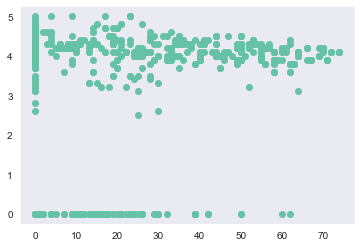

In [107]:
plt.scatter(df['Discount_percentage'],df['Star_rating'])

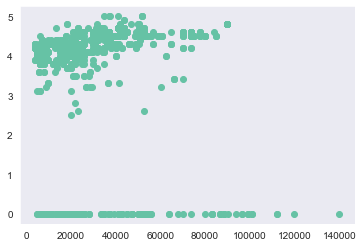

In [108]:
plt.scatter(df['MRP'],df['Star_rating'])

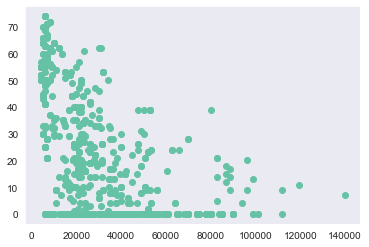

In [109]:
plt.scatter(df['MRP'],df['Discount_percentage'])